In [9]:
# data processing
import json
data_dir = './data/jiankangyun/forum.json'
with open(data_dir, 'r', encoding='utf-8') as f:
    data = json.loads(f.read())


In [10]:
counter = 0
new_data = dict()
for qas_id in data.keys():
    counter += 1
    new_data[qas_id] = data[qas_id]
    if counter >= 10000:
        break
json.dump(new_data, open('./data/jiankangyun/mini_forum.json', 'w'))

In [17]:
with open('./checkpoints/jiankangyun/predictions.json', 'r') as f:
    js = json.loads(f.read())
count1 = [0] * 5
for _, answer in js.items():
    length = len("".join(answer.strip().split()))
    if length <= 10:
        count1[0] += 1
    elif length <= 50:
        count1[1] += 1
    elif length <= 100:
        count1[2] += 1
    elif length <= 200:
        count1[3] += 1
    else:
        count1[4] += 1

In [21]:
with open('./data/jiankangyun/mini_forum.json', 'r') as f:
    js = json.loads(f.read())
count2 = [0] * 5
for key in js.keys():
    ans_id = js[key]['Correct_ID']
    length = len(js[key]['Ans'][ans_id])
    if length <= 10:
        count2[0] += 1
    elif length <= 50:
        count2[1] += 1
    elif length <= 100:
        count2[2] += 1
    elif length <= 200:
        count2[3] += 1
    else:
        count2[4] += 1

In [28]:
count1

[5332, 4668, 0, 0, 0]

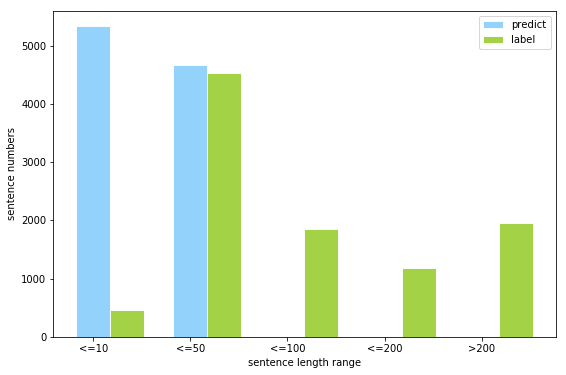

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6)) 
n = 5 
X = np.arange(n)+1 #X是1,2,3,4,5,6,7,8,柱的个数 #uniform均匀分布的随机数，normal是正态分布的随机数，0.5-1均匀分布的数，一共有n个 
Y1 = np.asarray(count1, dtype=np.int32) 
Y2 =  np.asarray(count2, dtype=np.int32) 
plt.bar(X, Y1, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='predict', lw=1) 
plt.bar(X+0.35, Y2, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='label', lw=1) 
plt.legend(loc="upper right")
plt.xlabel('sentence length range')
plt.ylabel('sentence numbers')
plt.xticks(range(1, n+1), ['<=10', '<=50', '<=100', '<=200', '>200'])
plt.show()

In [ ]:
import re
re.search(re.escape(data['731453']['Ans'][data['731453']['Correct_ID']]), "".join(data['731453']['Ans']))


In [ ]:
from tqdm import tqdm
pbar = tqdm(data.keys())
for _, qas_id in enumerate(pbar):
    pbar.set_description(qas_id)